# Descriptive Statistics And Visual Representation Of The Simulated Qualitative Bivariate Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sidetable as stb
import statistics
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

os.chdir("C:/Users/user/Desktop/STA413 GIWA/Python class")

In [2]:
path = os.getcwd()
path

'C:\\Users\\user\\Desktop\\STA413 GIWA\\Python class'

In [31]:
univqualdoub = pd.read_excel("Assignment 3.xlsx")
univqualdoub.head()

,Hair Color,BMI Status
0,Red,NORMAL
1,Brunette,NORMAL
2,Red,UNDERWEIGHT
3,Blonde,UNDERWEIGHT
4,Brunette,NORMAL


In [30]:
univqualdoub.describe(include = "all")

,Hair Color,BMI Status
count,250,250
unique,4,5
top,Blonde,UNDERWEIGHT
freq,69,86


In [5]:
univqualdoub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hair Color  250 non-null    object
 1   BMI Status  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [25]:
#Crosstabulation of two categorical variables for the chi-square test
table = pd.crosstab(univqualdoub["Hair Color"],
                            univqualdoub['BMI Status"],
                               margins = False)
print(table)

BMI Status  EXTREMELY OBESE  NORMAL  OBESE  OVERWEIGHT  UNDERWEIGHT
Hair Color                                                         
Blonde                    0      21     12           9           27
Brown                     1      11      9          13           20
Brunette                  0      23      6          14           16
Red                       2      19      8          16           23


In [7]:
univqualdoub.mode()

,Hair Color,BMI Status
0,Blonde,UNDERWEIGHT


In [29]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table1 = table
print(table1)
teststatistic, pvalue , dof, expectedfreq = chi2_contingency(table1)
print("dof=%d" % dof)
# %d means integer
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
#ppf - Percent point function
print("probability = %.3f, critical = %.3f, stat = %.3f" % (prob, critical, teststatistic))
if abs(teststatistic) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (fail to reject H0)")
# interpret p-value
alpha = 1.0 - prob
print("significance = %.3f, p = %.3f" % (alpha, pvalue))
if pvalue <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (fail to reject H0)")

BMI Status  EXTREMELY OBESE  NORMAL  OBESE  OVERWEIGHT  UNDERWEIGHT
Hair Color                                                         
Blonde                    0      21     12           9           27
Brown                     1      11      9          13           20
Brunette                  0      23      6          14           16
Red                       2      19      8          16           23
dof=12
probability = 0.950, critical = 21.026, stat = 12.771
Independent (fail to reject H0)
significance = 0.050, p = 0.386
Independent (fail to reject H0)


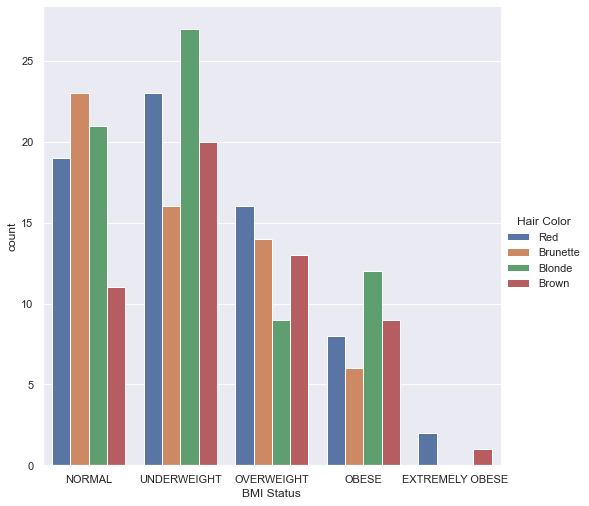

In [34]:
#grouped bar charts
sns.catplot(x = "BMI Status", hue = "Hair Color", kind = "count", data = univqualdoub , height = 7)
plt.show()


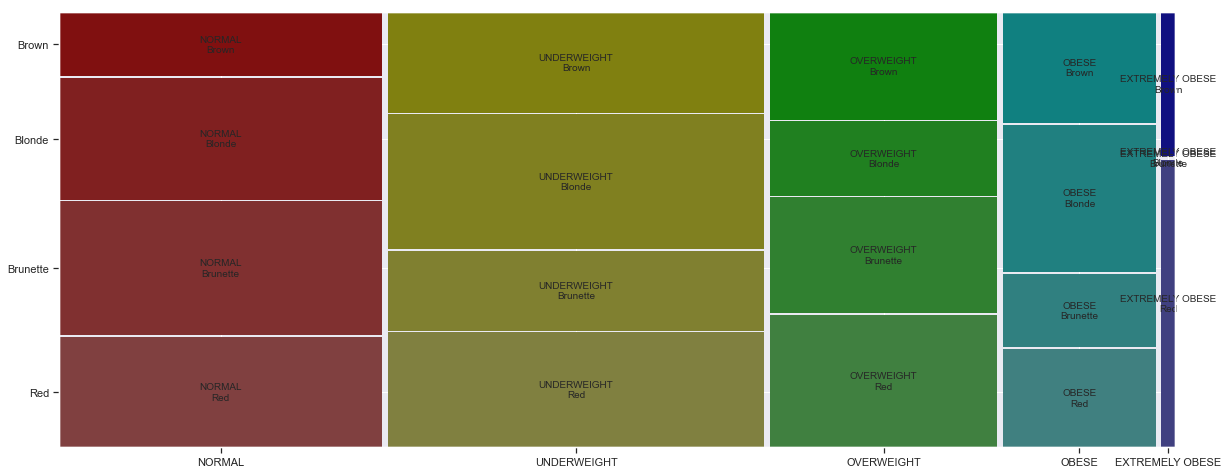

In [11]:
mosaic(data=univqualdoub, index=["BMI Status", "Hair Color"])
sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

#The mosaic plot shows that underweight blonde students have the highest proportion